<h2>Introdução:</h2>

A análise dos dados de marketing de uma organização é uma das aplicações mais típicas da ciência de dados. Campanhas de marketing tem como objetivo informar e criar valor para satisfazer as necessidades de um público-alvo, que por sua vez retribuem a organização com a aquisição de seus produtos e consequente geração de receita. 

A análise dos dados de uma campanha de marketing podem ser utilizados para:

a) Predição do resultado de futuras campanhas de marketings para diferentes tipos de clientes e identificação dos fatores que mais afetam estes resultados. Essas informações podem ajudar na elaboração de campanhas de marketing mais eficientes.

b) Identificar e segmentar a clientela em diferentes perfis. Ajudando na escolha do público-alvo de futuras campanhas. 

O objetivo geral deste estudo é aplicar técnicas de ciência de dados para analisar as informações de um banco de dados de uma campanha de marketing de uma instituição financeira e extrair insights que possam orientar suas futuras estratégias de marketing.

Neste estudo são utilizados os dados do Bank Marketing Data Set provisionados pelo UCI Machine Learning Repository (<a href="https://archive.ics.uci.edu/ml/datasets/bank+marketing">link</a>). Esses dados se referem a uma campanha de marketing de uma instituição bancária Portuguesa, onde clientes foram contatados via ligação telefônica, para serem oferecidos contratos de depósito a termo. 

Um depósito bancário a termo é um acordo em que o depositante concorda em deixar um montante de dinheiro depositado em uma instituição financeira por um certo período de tempo, e a instituição financeira por sua vez concorda em devolver o montante acrescido de juros para o depositante ao fim do período. 

Cada entrada neste banco de dados se refere a um cliente que foi contactado pela campanha de marketing, e inclui informações acerca das características pessoais do cliente, informações relacionadas a campanha e a resposta final do cliente de aceite ou recusa da oferta do produto (contrato de depósito a termo).

O objetivo mais específico deste estudo será utilizar técnicas de machine learning para construir um modelo de previsão da chance de sucesso da campanha de marketing, e identificar quais fatores mais afetam esta chance. 

<h2>Sumário</h2>: <br>
<b>A. Descrição Dos Dados</b><br>
I.Dados de características do cliente.<br>
II.Dados relacionados ao ultimo contato.<br>
III.Outras variáveis.<br>
IV.Variável alvo.<br>

<b>B. Análise Exploratória Dos Dados</b><br>
I.Análise das variáveis numéricas<br>
II.Outliers (identificação e tratamento)<br>
III.Análise das variáveis categóricas<br>
IV.Análise da variável alvo<br>
V.Análise da relação entre a variável alvo e as outras variáveis categóricas<br>
VI.Análise da relação entre a variável alvo e as outras variáveis numéricas<br>

<b>C. Limpeza Dos Dados</b><br>

<b>D. Modelo de Machine Learning</b><br>

<b>E. Conclusões</b><br>

<h1>Setup:</h1>
Preparando o ambiente com importação de livrarias e carregando o banco de dados utilizado.

In [4]:
#importando livrarias de manipulação de dados e algebra linear 
import numpy as np
import pandas as pd

#importando livrarias para visualização gráfica
import matplotlib.pyplot as plt
import seaborn as sns

#importando livrarias de machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import xgboost

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import accuracy_score #metrics

#importando instrumentos para busca de hyperparametros
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#determinando caminho para armazenamento dos resultados
import os
print(os.listdir("C:\Estudos\Bancos de Dados\input"))

#Determinando caminho do banco de dados e carregando para um data.frame
bank_filepath = "C:/Estudos/Bancos de Dados/bank.csv"
db = pd.read_csv(bank_filepath)

[]


<h2>A. Descrição dos Dados</h2>

In [5]:
#Mostrando primeiras linhas do banco de dados
db.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [173]:
print("O banco de dados contém {rows} linhas, e 17 colunas".format(rows = len(db)))

O banco de dados contém 11162 linhas, e 17 colunas


Este banco de dados contém 17 variáveis e 11162 observações. As 17 variáveis contidas no banco de dados podem ser dividas em 4 categorias: 1) dados de características do cliente, 2) dados relacionados ao último contato da campanha, 3) outras variáveis, 4) variável alvo do modelo de predição, no caso 'deposit' que informa se o cliente aceitou ou não a oferta da campanha.

<h3>A.I Dados de caracteristicas dos clientes</h3>

<b>1.age</b>: Idade do cliente (numérico)</br>
<b>2.job</b>: Tipo de trabalho desempenhado pelo cliente (11 categorias):</br>
<table>
  <tr>
    <th style="text-align: center; vertical-align: middle;">1.Trabalho administrativo</th>
    <th style="text-align: center; vertical-align: middle;">2.Colarinho azul</th>
    <th style="text-align: center; vertical-align: middle;">3.Empreendedor</th>
  </tr>
  <tr>
      <td style="text-align: center; vertical-align: middle;"><b>4.Trabalho Doméstico</b></td>
    <td style="text-align: center; vertical-align: middle;"><b>5.Trabalho gerencial</b></td>
    <td style="text-align: center; vertical-align: middle;"><b>6.Aposentado</b></td>
  </tr>
  <tr>
    <td style="text-align: center; vertical-align: middle;"><b>7.Trabalho por conta própria</b></td>
    <td style="text-align: center; vertical-align: middle;"><b>8.Indústria de serviços</b></td>
    <td style="text-align: center; vertical-align: middle;"><b>9.Técnico</b></td>
  </tr>
  <tr>
    <td style="text-align: center; vertical-align: middle;"><b>10.Estudante</b></td>
    <td style="text-align: center; vertical-align: middle;"><b>11.Desempregado</b></td>
    <td style="text-align: center; vertical-align: middle;"><b>12.Desconhecido</b></td>
  </tr>
</table>
<b>3.marital</b>: Estado conjugal do cliente (4 categorias): solteiro, casado, divorciado, desconhecido.

<b>4.education</b>: Grau de educação do cliente (4 categorias): primário(ensino fundamental), secundário(ensino médio), terciário(ensino superior), desconhecido.

<b>5.default</b>: Possui dívida? (2 categorias): Sim/não.

<b>6.housing</b>: Cliente tomou empréstimo imobiliário ? (3 categorias): sim, não, desconhecido.

<b>7.loan</b>: Cliente tomou empréstimo pessoal? (3 categorias): sim, não, desconhecido.

<b>8.balance</b>: Saldo do cliente (numérico)



<h3>A.II Dados relacionados ao último contato da campanha</h3>

<b>9.contact</b>: Meio de comunicação utilizado para o último contato (3 categorias): telefone, celular, desconhecido.

<b>10.month</b>: Mês do ano em que foi realizado o último contato (12 categorias): jan, fev, ... , dez.

<b>11.day</b>: Dia do mês em que foi realizado o último contato (numérico)

<b>12.duration</b>: Duração do último contato em segundos. (numérico).


<h3>A.III Outras variáveis</h3>

<b>13.campaign</b>: Número de contatos realizados com o cliente durante essa campanha, incluindo o último contato. (numérico).

<b>14.pdays</b> Número de dias que se passaram desde que o cliente foi contactado em uma campanha anterior (numérico 999; significa que o cliente não foi contactado na campanha anterior).

<b>15.previous</b>: Número de contatos realizados com este cliente em campanhas anteriores. (numérico).

<b>16.poutcome</b>: Resultado da campanha anterior. (3 categorias): Sucesso, falha, não-se-aplica.


<b>4) Variável alvo:</b></br>
<b>17.deposit</b>: O cliente aceitou a proposta de realizar um deposito a termo? (2 categorias): Sim/Não.

<h2>B. Análise Exploratoria dos Dados:</h2>

In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Não existem dados faltantes neste banco de dados (missings), caso houvesse seria necessário implementar alguma estratégia para lidar com eles em nossos modelos de machine learning (imputação de medidas centrais para preenchimento dos dados faltantes, ou até mesmo descartar colunas/linhas afetadas). Das 17 variáveis contidas no banco de dados, 7 são numéricas e 10 categóricas.

<h3>B.I Análise das variáveis numéricas</h3>

Calculando média, desvio padrão, quartis, min e max das variáveis numéricas.

In [7]:
db.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Plotando histogramas das variáveis numéricas: 

In [10]:
#configuração de estilo dos gráficos.
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='grey')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

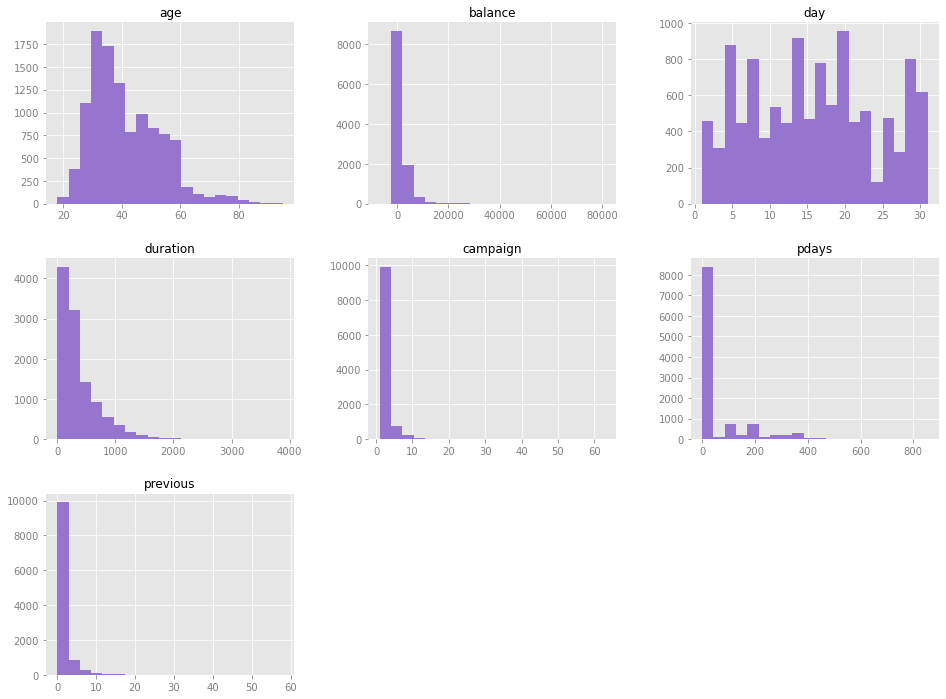

In [9]:
#plotando os gráficos
db.hist(bins=20, figsize=(16,12), color='#9575cd')
plt.show()

<h3>B.II Outliers (identificação e tratamento)</h3>

Um dos métodos mais utilizados para identificação de outliers consiste em utilizar o valor calculado do intervalo interquartil de uma variável para estabelecer um intervalo limite fora do qual as observações serão consideradas outliers. O intervalo interqual de uma variável é simplesmente a diferença entre o valor do seu terceiro quartil e o valor do seu primeiro quartil:</br>
IIQ = Q3 - Q1</br>
Por exemplo calculando o IIQ para a variável 'duration' temos:</br>
Q1('duration') = 138 ; Q3('duration') = 496 ; IIQ('duration') = 358</br>
Usualmente o intervalo limite é construído utilizando uma proporção de 1,5x da IIQ, de modo que:</br>
[Q1 - 1,5(IIQ);  Q3 + 1,5(IIQ)]</br>
Valores fora deste limite são considerados outliers.
            Podemos fazer a crítica de que esta é uma regra heurística, e sua aplicabilidade depende da amplitude da distribuição dos valores da variável. Mesmo assim, vamos utilizá-la para guiar nossa exploração dos dados. A seguir vamos calcular os limites do intervalo para identificação de outliers para as variáveis numéricas.

In [11]:
# Definindo função para calculo do intervalo para identificação de outliers
d_limout = {
    'Variável': [],
    'IIQ': [],
    'Lim_Sup': [],
    '% obs acima': [],
    'Lim_Inf': [],
    '% obs abaixo': []
        }
def limite_iiq(var):
    Q1 = np.percentile(db[var], 25,
                        interpolation = 'midpoint')
 
    Q3 = np.percentile(db[var], 75,
                       interpolation = 'midpoint')
    IIQ = Q3 - Q1
    upper = Q3 + 1.5 * IIQ
    lower = Q1 - 1.5 * IIQ
    perc_outp = round(len (db[db[var] > upper] ) / len(db) * 100, 2)
    perc_outm = round(len (db[db[var] < lower] ) / len(db) * 100, 2)
    d_limout['Variável'].append(var)
    d_limout['IIQ'].append(IIQ)
    d_limout['Lim_Sup'].append(upper)
    d_limout['% obs acima'].append(perc_outp)
    d_limout['Lim_Inf'].append(lower)
    d_limout['% obs abaixo'].append(perc_outm)

In [12]:
# Calculando intervalos
var_num = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for e in var_num:
    limite_iiq(e)

In [13]:
df_d_limout = pd.DataFrame(data=d_limout)
df_d_limout

,Variável,IIQ,Lim_Sup,% obs acima,Lim_Inf,% obs abaixo
0,age,17.0,74.50,1.53,6.50,0.00
1,balance,1586.0,4087.00,9.42,-2257.00,0.04
2,day,14.0,43.00,0.00,-13.00,0.00
3,duration,358.0,1033.00,5.70,-399.00,0.00
4,campaign,2.0,6.00,5.38,-2.00,0.00
5,pdays,21.5,52.75,24.66,-33.25,0.00
6,previous,1.0,2.50,11.27,-1.50,0.00


Analisando a tabela podemos perceber que as variáveis 'balance', 'duration', 'campaign', 'pdays' e 'previous' possuem muitas observações acima do limite superior. A seguir vamos analisar cada uma das variáveis e decidir como lidar com os outliers.</br>

<b>'pdays'</b></br>
Essa variável indica o número de dias que se passaram desde que o cliente foi contactado em uma campanha de marketing anterior. Mais da metade das entradas tem valor '-1', indicando que o cliente não foi contactado em uma campanha anterior. Os dados tem bastante amplitude com 24.66% das observações estando fora do limite superior. O indicativo categórico do valor '-1' e a grande quantidade de outliers pode distorcer o resultado do modelo. A estratégia para lidar com essa situação será transformar essa variável em uma variável categórica binária com valor 'verdadeiro' caso o cliente tenha sido contactado em campanha anterior e 'falso' caso contrário.

<b>'previous'</b></br>
Essa variável informa quantos contatos foram realizados com o cliente em campanha anterior, a informação contida nesta variável também será resumida na nova variável categórica binária indicando se o cliente foi contatado ou não na campanha anterior.

<b>'campaign'</b></br>
Essa variável informa o número de contatos realizados com o cliente durante a campanha atual. Em média foram realizados 2,5 contatos por cliente, porém 5,38% das observações estão acima do limite superior calculado de 6 contactos, com o valor máximo de 63 contatos. A estratégia para lidar com os outliers dessa variável será imputar o valor do limite superior '6' para todas as observações com valor para além deste limite.

<b>'duration'</b></br>
Essa variável informa a duração do último contato com o cliente em segundos. Seu valor médio é de 372 seg e o limite superior calculado foi de 1033 seg; 5,70% das observações estão acima deste limite. A estratégia para lidar com os outliers também será a imputação do valor do limite para os outliers.

<b>'contact'</b></br>
Essa variável informa por qual meio de comunicação o contato foi feito, as categorias são telefone, celular ou desconhecido, diante da incerteza em relação a qual meio de comunicação a categoria desconhecido se refere, esta variável será desconsiderada nas análises e modelagem subsequentes.

Em resumo as modificações que serão feitas no banco de dados serão:</br>
a) As variáveis 'pdays', 'previous' e 'contact' serão excluídas.</br>
b) Será incluída uma nova variável categórica (contato_ant) indicando se o cliente foi contactado em campanha anterior.</br>
c) Valores outliers nas variáveis 'campaign' e 'duration' serão substituídos pelo valor do limite superior.</br>
d) Observações com valor superior a 6000 para variável 'balance' serão descartadas.

In [14]:
#realizando as alterações no banco de dados:
#criando nova variável categorica indicativa de contato em campanha anterior:
db['contato_ant'] = ['no' if x == 0 else 'yes' for x in db['previous']]
#excluindo variáveis 'pdays' e 'previous'
db_2 = db.loc[:, ~db.columns.isin(['pdays', 'previous', 'contact'])]
#substituindo valores dos outliers em 'campaign'
db_2.loc[(db_2.campaign > 6), 'campaign'] = 6
#substituindo valores dos outliers em 'duration'
db_2.loc[(db_2.duration > 1033), 'duration'] = 1033
#descartando observações com 'balance' > 6000:
db_3 = db_2[db_2['balance'].between(-6848, 6000)]

C:\Users\Farley\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [15]:
db_3.shape

(10598, 15)

Com as modificações, o banco de dados agora possui 10598 linhas (564 linhas excluídas) e 15 colunas (3 colunas excluídas, uma nova coluna criada).

In [16]:
db_3.describe()

,age,balance,day,duration,campaign
count,10598.000000,10598.000000,10598.000000,10598.000000,10598.000000
mean,41.063031,996.987545,15.640215,352.253727,2.239290
std,11.823191,1308.569133,8.433662,284.591997,1.519871
min,18.000000,-6847.000000,1.000000,2.000000,1.000000
25%,32.000000,106.000000,8.000000,138.000000,1.000000
50%,38.000000,490.000000,15.000000,254.000000,2.000000
75%,49.000000,1413.000000,22.000000,494.000000,3.000000
max,95.000000,5990.000000,31.000000,1033.000000,6.000000


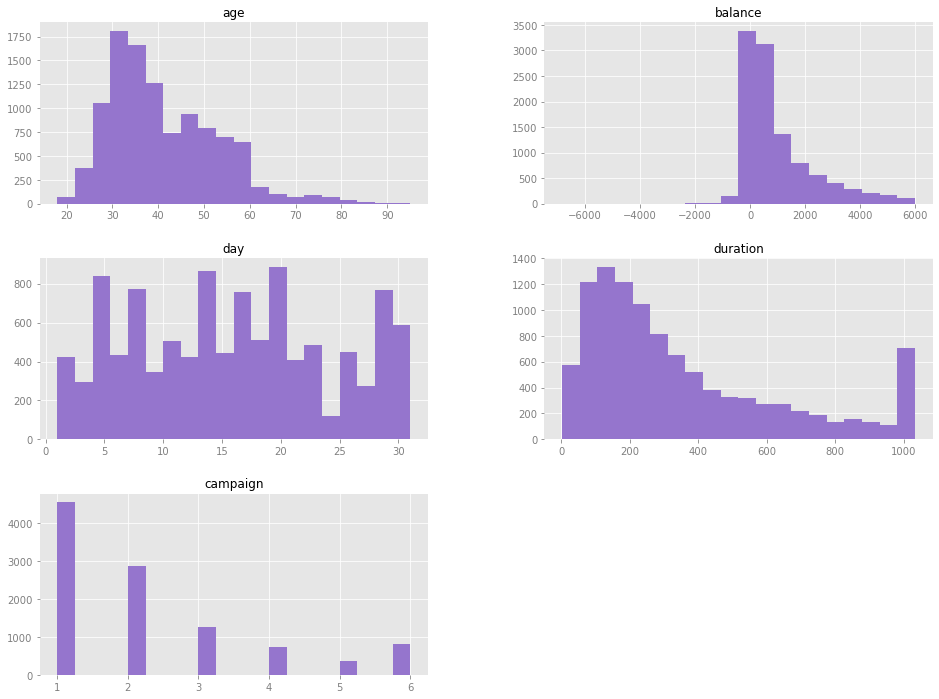

In [17]:
db_3.hist(bins=20, figsize=(16,12), color='#9575cd')
plt.show()

<h3>B.III Análise das variáveis categóricas</h3>

Plotando histograma das variáveis categóricas, eixo y medido em frequência relativa.

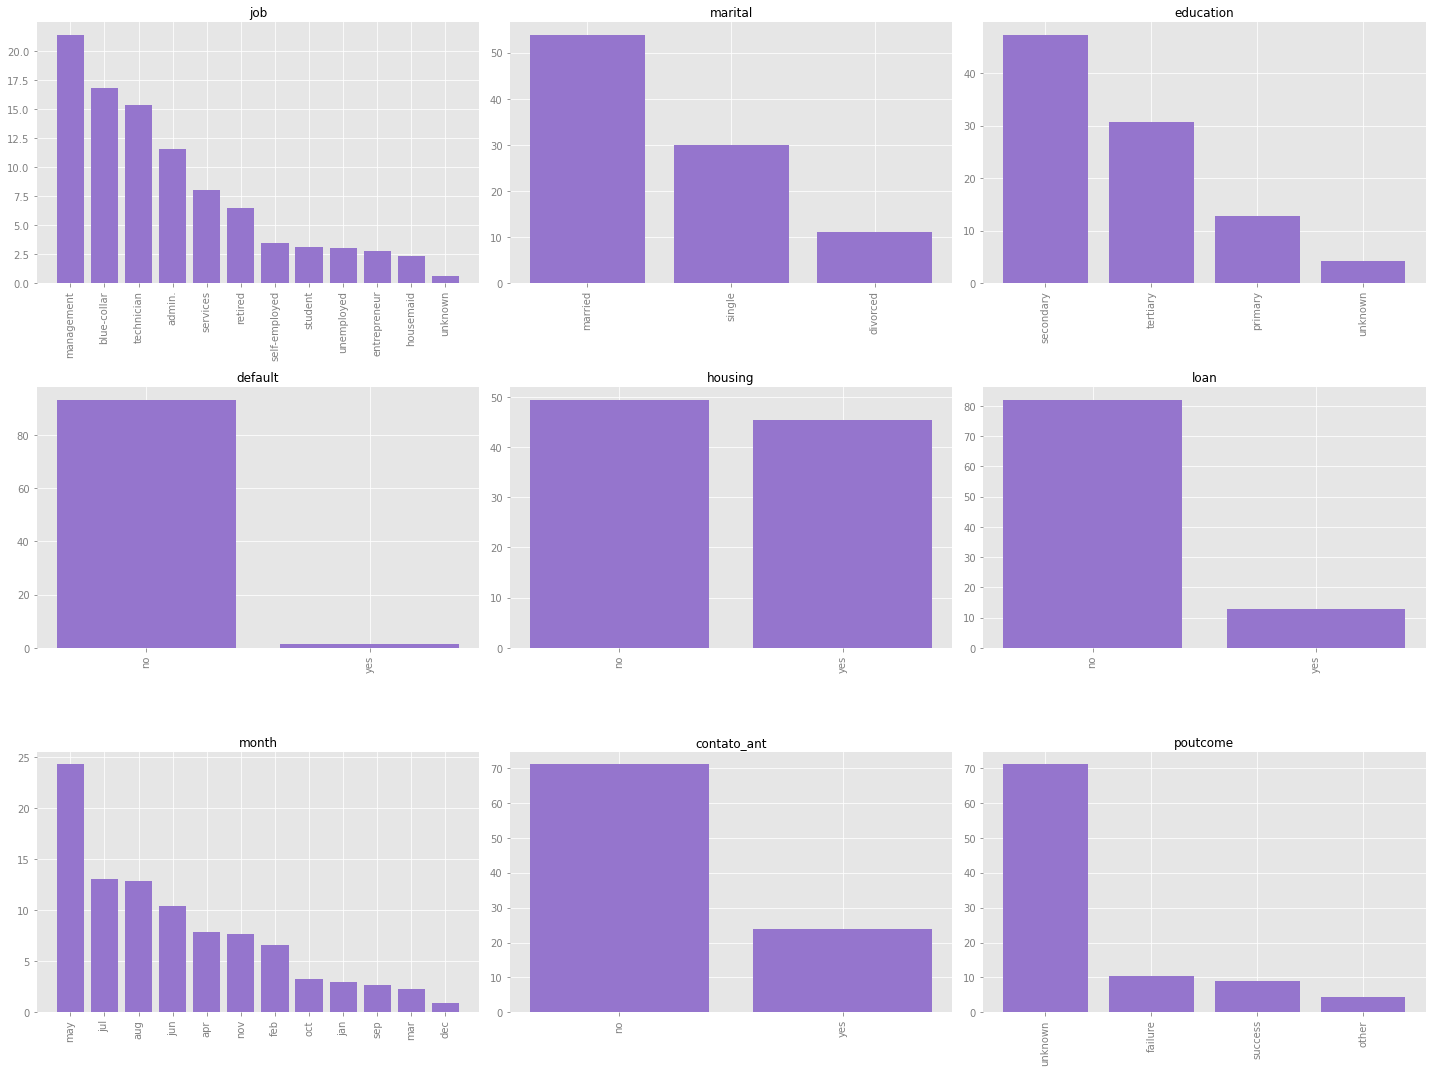

In [18]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'contato_ant', 'poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = db_3[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values/11162*100, tick_label = value_counts.index, color='#9575cd')
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    counter += 1
fig.tight_layout()
plt.show()

<b>Observações:</b></br>
a) As categorias de trabalho mais presentes na amostra são gerencial, de colarinho-azul, técnico, e administrativo, somadas elas constituem mais de 60% da amostra.</br>
b) Mais da metade dos clientes da amostra é casado.</br>
c) A maior parte dos clientes da amostra tem educação de nível secundário.</br>
d) A grande maioria dos clientes da amostra não possuem dívidas, nem tomaram empréstimo pessoal.</br>
e) A quantidade de clientes com e sem empréstimo imobiliário é parecida.</br>
f) A maior parte dos contatos foi feita via celular, no mês de maio.</br>
g) Cerca de 20% dos clientes haviam sido contactados na campanha anterior.</br>

<h3>B.IV Análise da variável alvo</h3>

Plotando histograma para variável 'deposit'

<AxesSubplot:title={'center':'Deposit'}>

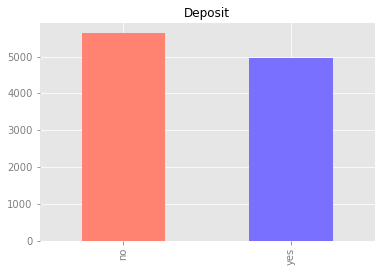

In [186]:
value_counts = db_3['deposit'].value_counts()

value_counts.plot.bar(title = 'Deposit', color = ['#FF8370','#7A70FF'])

In [187]:
per_yes = round(len (db_3[db_3['deposit'] == 'yes'] ) / len(db) * 100, 3)
per_no = round(len (db_3[db_3['deposit'] == 'no'] ) / len(db) * 100, 3)
print(f'{per_yes}% dos clientes aceitaram a oferta')
print(f'{per_no}% dos clientes recusaram a oferta')

44.526% dos clientes aceitaram a oferta
50.421% dos clientes recusaram a oferta


A quantidade de respostas "sim" e "não" é semelhante.

<h3>B.V Análise da relação entre a variável alvo e as outras variáveis categóricas</h3>

A seguir serão plotados histogramas comparando a frequência de aceites e recusas para as diferentes categorias das variáveis categóricas

<AxesSubplot:title={'center':'Resposta("deposit") por profissão '}>

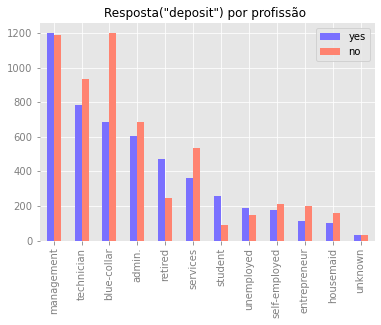

In [19]:
# Plotando o gráfico de contagem de respostas por categoria da variável 'job'.
j_db = pd.DataFrame()

j_db['yes'] = db_3[db_3['deposit'] == 'yes']['job'].value_counts()
j_db['no'] = db_3[db_3['deposit'] == 'no']['job'].value_counts()

j_db.plot.bar(title = 'Resposta("deposit") por profissão ', color = ['#7A70FF','#FF8370'])

<AxesSubplot:title={'center':'Resposta("deposit") por situação conjugal'}>

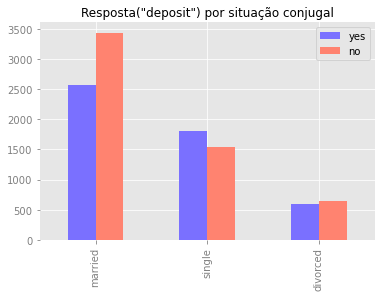

In [20]:
# Plotando o gráfico de contagem de respostas por categoria da variável 'marital'.
j_df = pd.DataFrame()

j_df['yes'] = db_3[db_3['deposit'] == 'yes']['marital'].value_counts()
j_df['no'] = db_3[db_3['deposit'] == 'no']['marital'].value_counts()

j_df.plot.bar(title = 'Resposta("deposit") por situação conjugal', color = ['#7A70FF','#FF8370'])

<AxesSubplot:title={'center':'Resposta("deposit") por nível educacional'}>

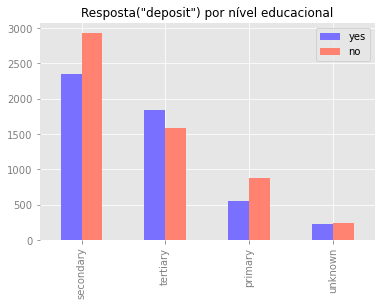

In [21]:
# Plotando o gráfico de contagem de respostas por categoria da variável 'education'.
j_df = pd.DataFrame()

j_df['yes'] = db_3[db_3['deposit'] == 'yes']['education'].value_counts()
j_df['no'] = db_3[db_3['deposit'] == 'no']['education'].value_counts()

j_df.plot.bar(title = 'Resposta("deposit") por nível educacional', color = ['#7A70FF','#FF8370'])

<AxesSubplot:title={'center':'Resposta("deposit") por empréstimo imobiliário '}>

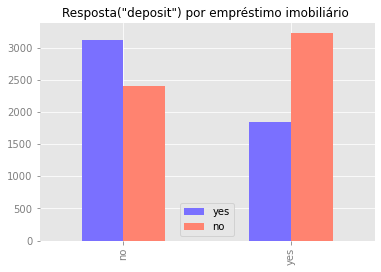

In [22]:
# Plotando o gráfico de contagem de respostas por categoria da variável 'housing'.
j_df = pd.DataFrame()

j_df['yes'] = db_3[db_3['deposit'] == 'yes']['housing'].value_counts()
j_df['no'] = db_3[db_3['deposit'] == 'no']['housing'].value_counts()

j_df.plot.bar(title = 'Resposta("deposit") por empréstimo imobiliário ', color = ['#7A70FF','#FF8370'])

<AxesSubplot:title={'center':'Resposta("deposit") por empréstimo pessoal '}>

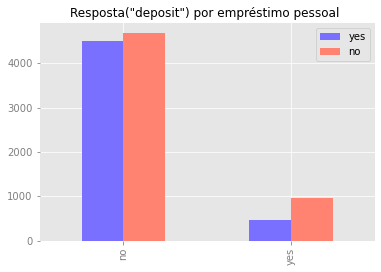

In [24]:
# Plotando o gráfico de contagem de respostas por categoria da variável 'loan'.
j_df = pd.DataFrame()

j_df['yes'] = db_3[db_3['deposit'] == 'yes']['loan'].value_counts()
j_df['no'] = db_3[db_3['deposit'] == 'no']['loan'].value_counts()

j_df.plot.bar(title = 'Resposta("deposit") por empréstimo pessoal ', color = ['#7A70FF','#FF8370'])

<AxesSubplot:title={'center':'Resposta("deposit") por cantato anterior'}>

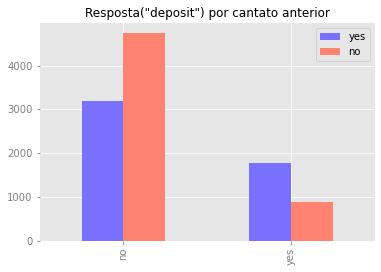

In [25]:
# Plotando o gráfico de contagem de respostas por categoria da variável 'contato_ant'.
j_df = pd.DataFrame()

j_df['yes'] = db_3[db_3['deposit'] == 'yes']['contato_ant'].value_counts()
j_df['no'] = db_3[db_3['deposit'] == 'no']['contato_ant'].value_counts()

j_df.plot.bar(title = 'Resposta("deposit") por cantato anterior', color = ['#7A70FF','#FF8370'])

<AxesSubplot:title={'center':'Resposta("deposit") por resultado da campanha anterior'}>

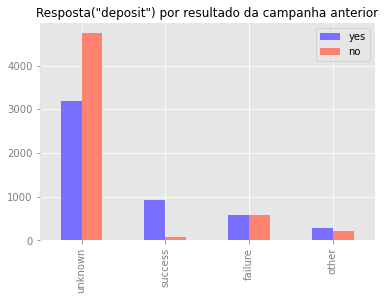

In [26]:
# Plotando o gráfico de contagem de respostas por categoria da variável 'contato_ant'.
j_df = pd.DataFrame()

j_df['yes'] = db_3[db_3['deposit'] == 'yes']['poutcome'].value_counts()
j_df['no'] = db_3[db_3['deposit'] == 'no']['poutcome'].value_counts()

j_df.plot.bar(title = 'Resposta("deposit") por resultado da campanha anterior', color = ['#7A70FF','#FF8370'])

<b>Observações:</b></br>
a) Os clientes que trabalham na área gerencial, aposentados, estudantes e desempregados, foram as quatro categorias profissionais que apresentaram uma quantidade maior de aceites que de recusa. Trabalhadores de colarinho-azul e do setor de serviços apresentam uma proporção de recusas maior.</br>
b) Solteiros apresentam uma quantidade maior de aceites do que recusas.</br>
c) Clientes com educação de nível terciário (educação superior) apresentaram uma quantidade de aceites maior que de recusas.</br>
d) Clientes que não possuem empréstimo imobiliário possuem uma quantidade de aceites maior que se recusa, enquanto que para os clientes com empréstimo imobiliário a quantidade de recusas é maior.</br>
e) Clientes que tomaram empréstimo pessoal apresentam proporção maior de recusa.</br>
f) Dentre os clientes que foram contactados em uma campanha anterior, a proporção de aceites na campanha atual é maior para os que também aceitaram a oferta da campanha anterior.

<h3>B.VI Análise da relação entre a variável alvo e as outras variáveis numéricas</h3>

A seguir serão apresentadas comparações entre as estatísticas das variáveis numéricas estratificadas pelo aceite ou recusa dos clientes.

In [27]:
#balance e deposit

b_df = pd.DataFrame()
b_df['balance_yes'] = (db_3[db_3['deposit'] == 'yes'][['deposit','balance']].describe())['balance']
b_df['balance_no'] = (db_3[db_3['deposit'] == 'no'][['deposit','balance']].describe())['balance']

b_df

,balance_yes,balance_no
count,4970.000000,5628.000000
mean,1182.356942,833.290689
std,1375.669078,1223.297057
min,-3058.000000,-6847.000000
25%,189.000000,52.750000
50%,650.500000,373.500000
75%,1766.000000,1138.000000
max,5990.000000,5969.000000


<AxesSubplot:title={'center':'Comparação das estatísticas para a variável "balance" entre os clientes que aceitaram e que recusaram a oferta'}>

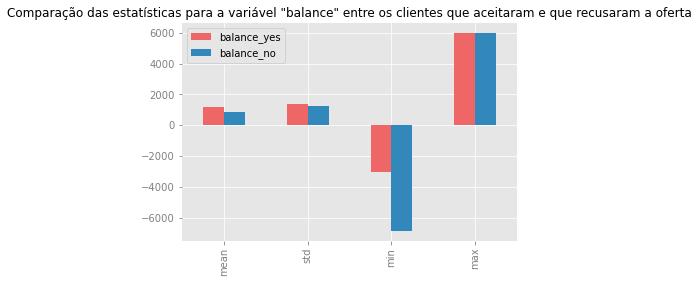

In [30]:
b_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Comparação das estatísticas para a variável "balance" entre os clientes que aceitaram e que recusaram a oferta')

In [32]:
#age and deposit

a_df = pd.DataFrame()
a_df['age_yes'] = (db_3[db_3['deposit'] == 'yes'][['deposit','age']].describe())['age']
a_df['age_no'] = (db_3[db_3['deposit'] == 'no'][['deposit','age']].describe())['age']

a_df

,age_yes,age_no
count,4970.000000,5628.000000
mean,41.445473,40.725302
std,13.388912,10.232809
min,18.000000,18.000000
25%,31.000000,33.000000
50%,38.000000,39.000000
75%,50.000000,48.000000
max,95.000000,89.000000


<AxesSubplot:title={'center':'Comparação das estatísticas para a variável "age” entre os clientes que aceitaram e que recusaram a oferta'}>

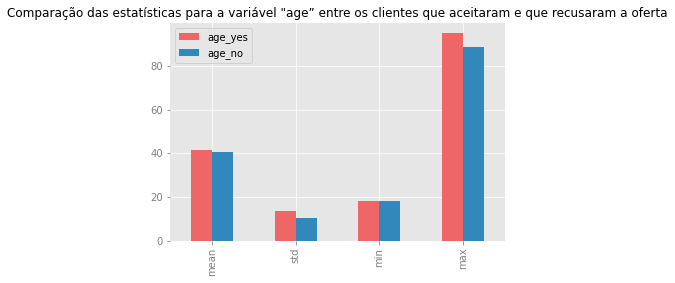

In [33]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Comparação das estatísticas para a variável "age” entre os clientes que aceitaram e que recusaram a oferta')

In [34]:
#campaign e deposit
c_df = pd.DataFrame()
c_df['campaign_yes'] = (db_3[db_3['deposit'] == 'yes'][['deposit','campaign']].describe())['campaign']
c_df['campaign_no'] = (db_3[db_3['deposit'] == 'no'][['deposit','campaign']].describe())['campaign']

c_df

,campaign_yes,campaign_no
count,4970.000000,5628.000000
mean,2.024748,2.428749
std,1.357133,1.627056
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,6.000000,6.000000


<AxesSubplot:title={'center':'Comparação das estatísticas para a variável "campaign" entre os clientes que aceitaram e que recusaram a oferta'}>

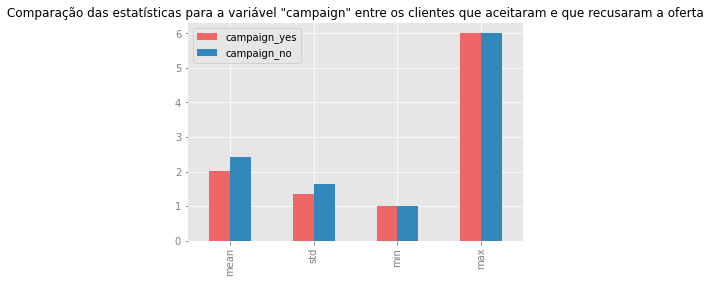

In [35]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Comparação das estatísticas para a variável "campaign" entre os clientes que aceitaram e que recusaram a oferta')

In [36]:
#campaign e deposit
c_df = pd.DataFrame()
c_df['duration_yes'] = (db_3[db_3['deposit'] == 'yes'][['deposit','duration']].describe())['duration']
c_df['duration_no'] = (db_3[db_3['deposit'] == 'no'][['deposit','duration']].describe())['duration']

c_df

,duration_yes,duration_no
count,4970.000000,5628.000000
mean,502.248692,219.795487
std,299.188652,189.900743
min,8.000000,2.000000
25%,244.250000,94.000000
50%,428.500000,163.000000
75%,726.750000,281.250000
max,1033.000000,1033.000000


<AxesSubplot:title={'center':'Comparação das estatísticas para a variável "duration" entre os clientes que aceitaram e que recusaram a oferta'}>

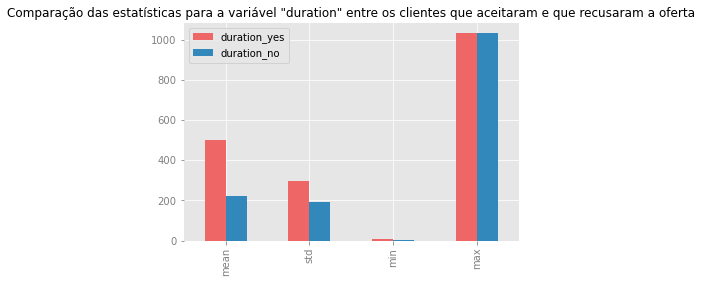

In [38]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Comparação das estatísticas para a variável "duration" entre os clientes que aceitaram e que recusaram a oferta'
)

<b>Observações:</b></br>
a) Clientes que aceitaram a oferta tendem a ser mais velhos e com maior saldo bancário.</br>
b) Clientes que aceitaram a oferta foram contactados menos vezes em média.</br>
c) Clientes que aceitaram a oferta tiveram um último contato mais longo.

<h2>C. Limpeza Dos Dados</h2>

Antes de prosseguirmos com a modelagem de machine learning os dados precisam ser preparados:</br>
a) As colunas com valores sim/não serão convertidas em valores booleanos.</br>
b) Colunas categóricas serão convertidas em variáveis dummies.</br>

In [39]:
def get_dummy_from_bool(row, column_name):
    return 1 if row[column_name] == 'yes' else 0


def clean_data(df):
    cleaned_df = db_3.copy()

    # Convertendo as colunas com valores 'yes', 'no' em colunas com valores booleanos
    bool_columns = ['default', 'housing', 'loan', 'deposit', 'contato_ant']
    for bool_col in bool_columns:
        cleaned_df[bool_col + '_bool'] = df.apply(lambda row: get_dummy_from_bool(row, bool_col), axis=1)

    cleaned_df = cleaned_df.drop(columns=bool_columns)

    # Convertendo colunas categóricas em colunas dummies
    cat_columns = ['job', 'marital', 'education', 'month', 'poutcome']
    for col in cat_columns:
        cleaned_df = pd.concat([cleaned_df.drop(col, axis=1),
                                pd.get_dummies(cleaned_df[col], prefix=col, prefix_sep='_', drop_first=True,
                                               dummy_na=False)], axis=1)

    return cleaned_df

In [40]:
cleaned_df = clean_data(db_3)

In [41]:
cleaned_df.head()

,age,balance,day,duration,campaign,default_bool,housing_bool,loan_bool,deposit_bool,contato_ant_bool,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1033,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,56,45,5,1033,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,41,1270,5,1033,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,55,2476,5,579,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,54,184,5,673,2,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


<h2>D. Modelo de Machine Learning</h2>

Modelo de classificação para a predição do resultado da campanha</br>
O banco de dados limpo será utilizado para treinar um modelo machine learning de classificação. Para tal será utilizada a biblioteca XGBoost. O resultado do modelo nos ajudará também a compreender quais fatores têm maior importância no processo de predição dos resultados da campanha.

Primeiramente precisamos separar parte dos dados para serem utilizados no treinamento e outra parte na validação do modelo.

In [42]:
X = cleaned_df.drop(columns = 'deposit_bool')
y = cleaned_df[['deposit_bool']]

In [43]:
TEST_SIZE = 0.3
RAND_STATE = 42

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

In [45]:
#Treinando o modelo XGBoost
xgb = xgboost.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train.squeeze().values)

#Calculando e exibindo os scores de performance do modelo.
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

print('XGB accuracy score para os dados de treinamento: %.3f: avaliação: %.3f' % (
        accuracy_score(y_train, y_train_preds),
        accuracy_score(y_test, y_test_preds)))

C:\Users\Farley\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:57:40] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB accuracy score para os dados de treinamento: 0.910: avaliação: 0.848


Uma vez que nossos dados possuem uma quantidade semelhante de recusas e aceites, podemos utilizar a pontuação de acurácia (accuracy score) para avaliar a eficiência do modelo. O accuracy score é medido pela razão entre número de predições corretas e o total de predições realizadas. Para o nosso modelo, e utilizando os dados de avaliação, o modelo teve um score de 0.848, isso quer dizer que do total de predições realizadas sobre os dados de avaliação o modelo foi capaz de predizer corretamente 84,8% das predições.

Calculando a importância de cada fator para o treinamento do modelo:

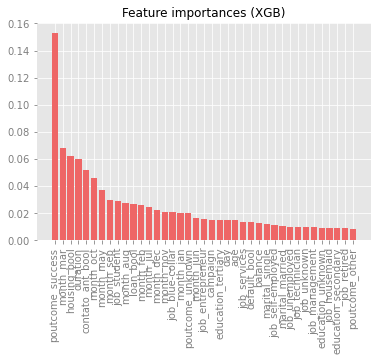

In [46]:
#calculando a importância dos fatores:
headers = ["name", "score"]
values = sorted(zip(X_train.columns, xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plotando as medidas de importância
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()

Como pode ser visto no diagrama acima as variáveis que demonstraram maior importância para o treinamento do modelo foram:<br>
<b>a)</b> Aceite do cliente em campanha anterior ('poutcome success').<br>
Clientes que já aceitaram propostas em campanhas anteriores têm maiores chances de aceitar novas propostas.<br>
<b>b)</b> Mês de março.<br>
<b>c)</b> Empréstimo imobiliário.<br>
Como visto em seção anterior, clientes que não possuem empréstimo imobiliário tem uma probabilidade maior de aceitarem a oferta, em relação aos clientes que possuem empréstimo imobiliário.<br>
<b>d)</b> Duração do último contato com cliente.<br>
Últimos contatos com duração maior tendem a resultar em um aceite do cliente com mais frequência.<br>
<b>e)</b> Estudante.<br>
Estudantes possuem uma proporção maior de aceites em relação a recusas que outras categorias profissionais.

Vamos investigar a relação entre mês em que foi realizado o contato, e a resposta do cliente, para tentarmos avaliar por qual razão o mês de março foi tão relevante para o treinamento do modelo:

<AxesSubplot:title={'center':'Resposta("deposit") por cantato anterior'}>

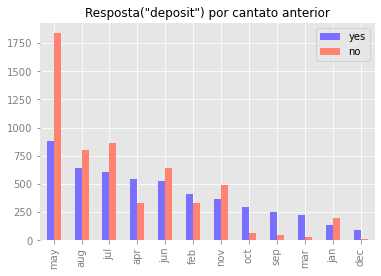

In [232]:
# Plotando o grafico de contagem de respostas por categoria da variavel 'contato_ant'.
j_df = pd.DataFrame()

j_df['yes'] = db_3[db_3['deposit'] == 'yes']['month'].value_counts()
j_df['no'] = db_3[db_3['deposit'] == 'no']['month'].value_counts()

j_df.plot.bar(title = 'Resposta("deposit") por cantato anterior', color = ['#7A70FF','#FF8370'])

Apesar de haver poucos um menor número de contatos realizados no mês de março, a proporção de aceites neste mês foi muito maior em relação ao número de recusas, o mesmo vale para os meses de outubro e setembro. Uma investigação mais minuciosa do processo da campanha seria necessária para julgar se esses dados são frutos de alguma sazonalidade real ou ruído estatístico.

Vamos realizar algumas avaliações mais pontuais:

Avaliando qual a melhor faixa de saldo para direcionar uma campanha:

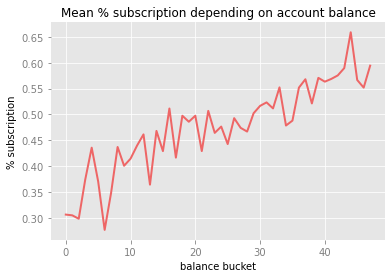

In [207]:
df_new = cleaned_df.copy()


df_new['balance_buckets'] = pd.qcut(df_new['balance'], 50, labels=False, duplicates = 'drop')


mean_deposit = df_new.groupby(['balance_buckets'])['deposit_bool'].mean()

#plot
plt.plot(mean_deposit.index, mean_deposit.values)
plt.title('Mean % subscription depending on account balance')
plt.xlabel('balance bucket')
plt.ylabel('% subscription')
plt.show()

In [222]:
df_new[df_new['balance_buckets'] == 35]['balance'].min()

1356

A proporção de aceites dos clientes varia positivamente com o aumento do saldo. Clientes com um saldo maior que 1356 apresentam uma proporção de aceites superior a 50%.

Avaliando o impacto da idade do cliente na probabilidade de aceite:

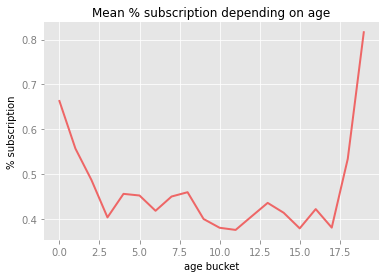

In [210]:

df_new['age_buckets'] = pd.qcut(df_new['age'], 20, labels=False, duplicates = 'drop')


mean_age = df_new.groupby(['age_buckets'])['deposit_bool'].mean()

#plot
plt.plot(mean_age.index, mean_age.values)
plt.title('Mean % subscription depending on age')
plt.xlabel('age bucket')
plt.ylabel('% subscription')
plt.show()

In [233]:
df_new[df_new['age_buckets'] == 1]['age'].max()

28

In [235]:
df_new[df_new['age_buckets'] == 18]['age'].max()

61

Clientes com idade menor que 28 anos e maior que 61 apresentam proporção de aceite maior que 50%. Já para a faixa etária entre 28 e 61 anos a proporção de aceite é inferior a 50%.

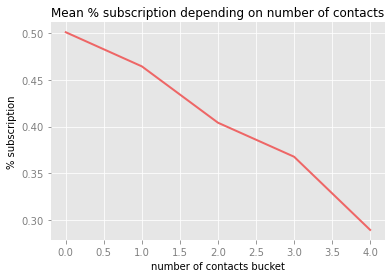

In [236]:
#introduce new column 'age_buckets' to  ''
df_new['campaign_buckets'] = pd.qcut(df_new['campaign'], 20, labels=False, duplicates = 'drop')

#group by 'balance_buckets' and find average campaign outcome per balance bucket
mean_campaign = df_new.groupby(['campaign_buckets'])['deposit_bool'].mean()

#plot average campaign outcome per bucket 
plt.plot(mean_campaign.index, mean_campaign.values)
plt.title('Mean % subscription depending on number of contacts')
plt.xlabel('number of contacts bucket')
plt.ylabel('% subscription')
plt.show()

In [237]:
df_new[df_new['campaign_buckets'] == 1]['campaign'].min()

3

A proporção de aceites cai em função do aumento do número de contatos realizados com o cliente durante a campanha. Do terceiro contato em diante com um cliente a proporção de aceite é menor que 50%.

<h3>E. Conclusões</h3>

Segundo as análises realizadas neste estudo, recomendamos que futuras campanhas de marketing sejam focadas nos seguintes publicos:

<b>a)</b> Clientes que já aceitaram propostas em campanhas de marketing anteriores.

<b>b)</b> Clientes que não possuem empréstimo imobiliário.

<b>c)</b> Estudantes.

<b>d)</b> Clientes com idade inferior a 28 anos e superior a 61 anos.

<b>e)</b> Clientes com saldo bancário superior a 1356$.
